# Demonstration of accessing lepton information

Import what we need from Matplotlib and ROOT:

In [1]:
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
pylab.rcParams['figure.figsize'] = 12,8

from ROOT import TChain

Create a "chain" of files (but just one file for now):

In [2]:
data = TChain("mini");  # "mini" is the name of the TTree stored in the data files
data.Add("/home/waugh/atlas-data/DataMuons.root")

1

This is how we plotted the pT of the leading lepton (the first, highest pT one) in each event before. We are looking at 1000 events, and exactly 1 lepton from each event, so our histogram has 1000 entries.

Number of entries = 1000


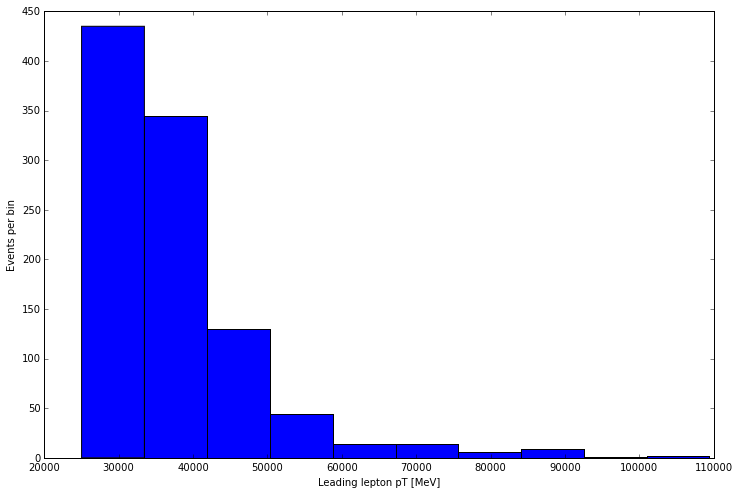

In [3]:
pt = []
for event_num in xrange(1000):
    data.GetEntry(event_num)
    pt.append(data.lep_pt[0])  # We are assuming there is at least one lepton in each event
    
n, bins, patches = plt.hist(pt)
plt.xlabel('Leading lepton pT [MeV]')
plt.ylabel('Events per bin')

n_entries = int(sum(n))
print("Number of entries = {}".format(n_entries))

Plotting the pT of *all* leptons is a bit more complicated, and we can see that there are more entries in the resulting histogram because some events have more than one lepton.

Number of entries = 1084


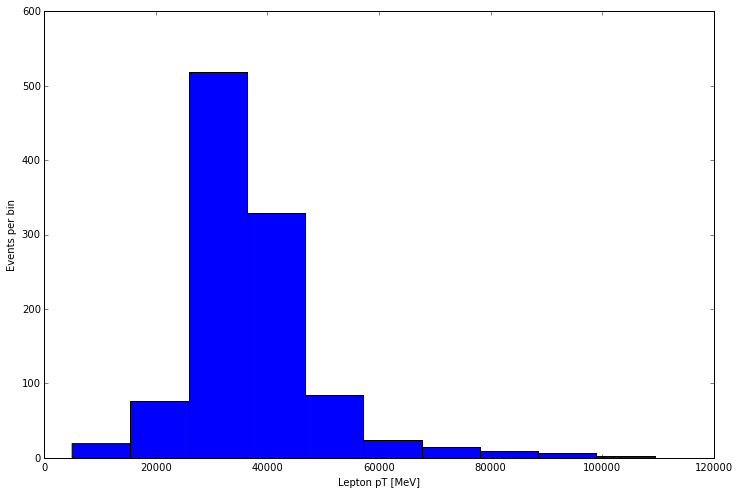

In [4]:
pt_leptons = []
for event_num in xrange(1000):              # loop over the events
    data.GetEntry(event_num)                # read the next event into memory
    num_leptons = data.lep_n                # number of leptons in the event
    for lepton_num in xrange(num_leptons):  # loop over the leptons within this event
        pt_lepton = data.lep_pt[lepton_num] # get the pT of the next lepton...
        pt_leptons.append(pt_lepton)        # ... and add it to the list
        
n, bins, patches = plt.hist(pt_leptons)
plt.xlabel('Lepton pT [MeV]')
plt.ylabel('Events per bin')

n_entries = int(sum(n))
print("Number of entries = {}".format(n_entries))